<a href="https://colab.research.google.com/github/ginelledsouza/Dogs-VS-Cats/blob/master/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dogs VS Cats**

# **Data Loading**

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [59]:
training = 'dog vs cat/dataset/training_set/'
testing = 'dog vs cat/dataset/test_set/'

The Dataset has already been seprated into two distinct folders containing the images of dogs and cats respectively. Let us view some images that are present in these training folders.

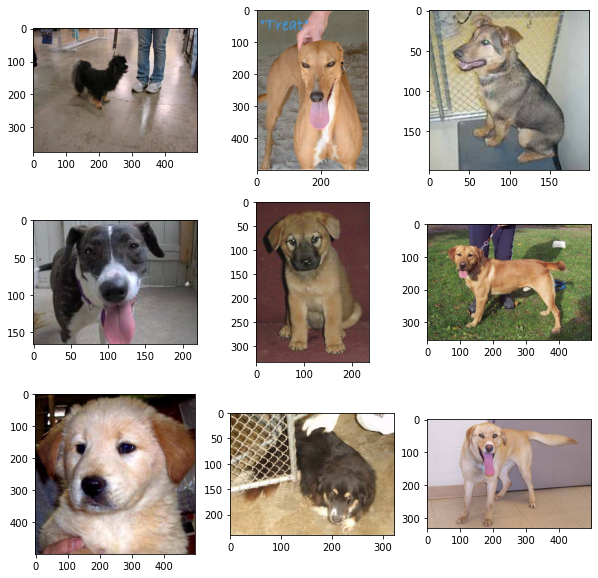

In [77]:
folder = 'dog vs cat/dataset/training_set/dogs'

plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    filename = folder + '/dog.100' + str(i) + '.jpg'
    image = imread(filename)
    plt.imshow(image)

plt.show()

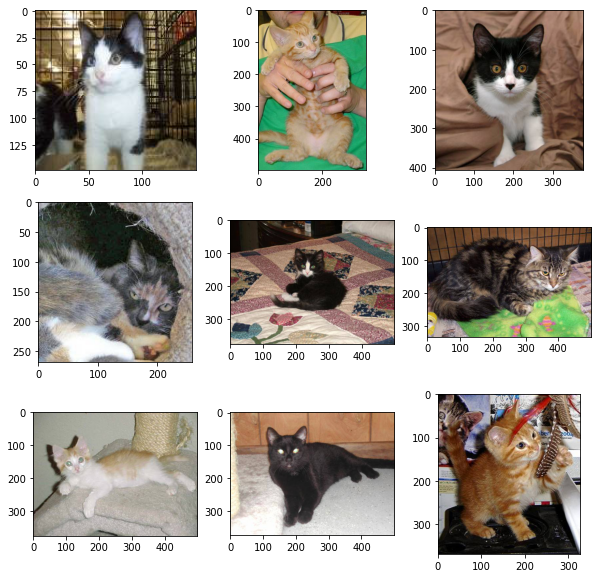

In [78]:
folder = 'dog vs cat/dataset/training_set/cats'

plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    filename = folder + '/cat.100' + str(i) + '.jpg'
    image = imread(filename)
    plt.imshow(image)

plt.show()

# **Image Pre-Processing**

Before training any image predictive model it is always nescessary to perform certain image manipulations (data augmentation) so that the predictive model are given a consistent images for the purpose of learning. For this we use the in built preprocessing method given by keras "ImageDataGenerator".

In [62]:
train_datagen = ImageDataGenerator( rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1)

test_datagen = ImageDataGenerator(rescale=1./255)

In [63]:
train_generator = train_datagen.flow_from_directory(training,
                                                    target_size=(200, 200),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(testing,
                                                        target_size=(200, 200),
                                                        batch_size=32,
                                                        class_mode='binary')


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# **Data Modeling**

In [64]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))

model2.add(Flatten())

model2.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model2.add(Dropout(0.15))

model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [65]:
model2.fit(train_generator,
                     steps_per_epoch = len(train_generator),
                     epochs=25,
                     validation_data=validation_generator,
                     validation_steps = len(validation_generator))

Epoch 1/25
250/250 [==============================] - 117s 469ms/step - loss: 0.9708 - accuracy: 0.5203 - val_loss: 0.6922 - val_accuracy: 0.5570
Epoch 2/25
250/250 [==============================] - 116s 463ms/step - loss: 0.6921 - accuracy: 0.5201 - val_loss: 0.6838 - val_accuracy: 0.5955
Epoch 3/25
250/250 [==============================] - 116s 463ms/step - loss: 0.6756 - accuracy: 0.5764 - val_loss: 0.6615 - val_accuracy: 0.6095
Epoch 4/25
250/250 [==============================] - 116s 463ms/step - loss: 0.6499 - accuracy: 0.6227 - val_loss: 0.6060 - val_accuracy: 0.6970
Epoch 5/25
250/250 [==============================] - 116s 465ms/step - loss: 0.6081 - accuracy: 0.6601 - val_loss: 0.5389 - val_accuracy: 0.7360
Epoch 6/25
250/250 [==============================] - 116s 464ms/step - loss: 0.5733 - accuracy: 0.6963 - val_loss: 0.5427 - val_accuracy: 0.7275
Epoch 7/25
250/250 [==============================] - 116s 463ms/step - loss: 0.5427 - accuracy: 0.7270 - val_loss: 0.4932 -

In [66]:
loss, acc =  model2.evaluate(validation_generator,verbose=0)
print('The accuracy of the model is %.3f'% (acc * 100.0),'%')

The accuracy of the model is 88.200 %


# **Predictions**

In [71]:
def test(directory):
    timage = load_img(directory, target_size = (200,200))
    timage = image.img_to_array(timage)
    timage = np.expand_dims(timage, axis = 0)
    result = model2.predict(x = timage)
    
    if result[0][0]  == 1:
        prediction = 'Dog'
    else:
        prediction = 'Cat'
    return prediction

In [72]:
print(test(testing + '/dogs/dog.4030.jpg'))

Dog


In [73]:
print(test(testing + '/cats/cat.4013.jpg'))

Cat
